In [215]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#loading and displaying dataset
df=pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [216]:
#data cleaning
#checking for null in data
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

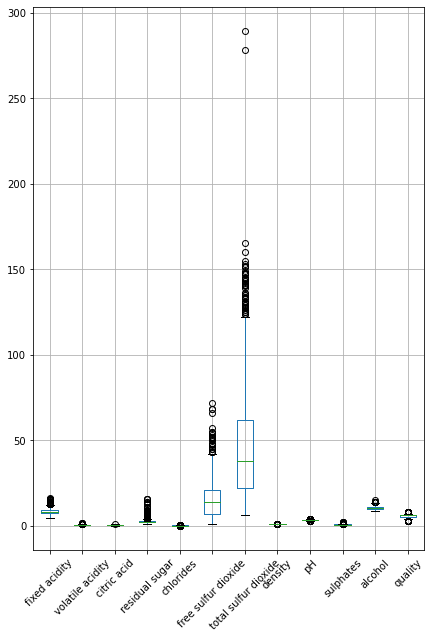

In [218]:
#Data is clean
#Detecting and removing outliers
plt.figure(figsize=(7,10))
df.boxplot()
plt.xticks(rotation = 45)
plt.show()

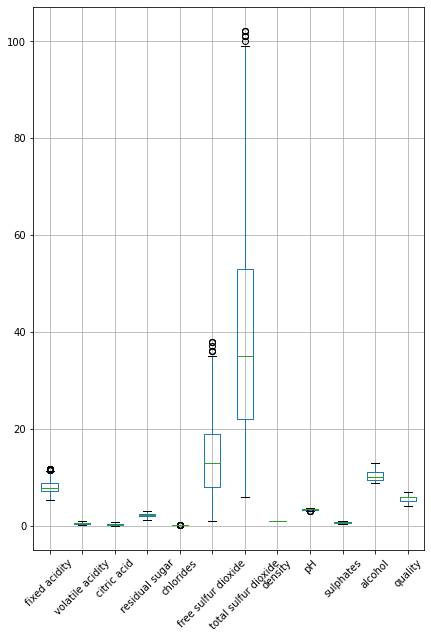

In [222]:
#removing outliers
cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
        'total sulfur dioxide','density','pH','sulphates','alcohol','quality']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
plt.figure(figsize=(7,10))
df.boxplot()
plt.xticks(rotation = 45)
plt.show()

In [223]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [231]:
#Exploratory Data Analysis
#Univariate Non-Graphical-
#statistical analysis for single data group
print(df["free sulfur dioxide"].value_counts(),"\n")
print(df["residual sugar"].value_counts(),"\n")
print(df["alcohol"].value_counts(),"\n")
print(df["quality"].value_counts(),"\n")

6.0     71
5.0     62
15.0    53
10.0    52
12.0    48
13.0    47
9.0     44
16.0    43
7.0     43
11.0    39
14.0    38
8.0     37
17.0    37
18.0    36
4.0     27
19.0    27
21.0    27
24.0    26
3.0     24
20.0    20
29.0    18
26.0    18
22.0    16
27.0    14
32.0    14
23.0    14
28.0    13
25.0    13
31.0    12
34.0    10
35.0     7
30.0     7
33.0     7
36.0     3
38.0     3
1.0      2
37.0     1
Name: free sulfur dioxide, dtype: int64 

2.00    114
1.90     89
2.10     88
2.20     84
2.30     83
1.80     82
2.50     67
2.40     65
1.70     57
2.60     55
1.60     44
2.80     31
2.70     28
1.40     24
1.50     21
3.00     13
2.90     11
1.20      4
1.30      3
3.10      2
2.05      2
1.75      1
1.65      1
2.55      1
2.35      1
2.25      1
2.65      1
Name: residual sugar, dtype: int64 

9.500000     91
9.400000     59
9.800000     54
10.000000    49
9.600000     40
9.300000     39
11.000000    39
9.700000     39
9.200000     38
10.500000    35
10.400000    32
10.100000    3

In [234]:
#Bivariate Non-Graphical
#statistical analysis for two data groups
pd.crosstab(df["alcohol"],df["quality"])

quality,4,5,6,7
alcohol,,,,
8.700000,0,0,2,0
9.000000,1,6,8,0
9.050000,1,0,0,0
9.100000,0,8,4,0
9.200000,2,26,10,0
9.300000,2,27,10,0
9.400000,1,43,15,0
9.500000,0,57,32,2
9.550000,0,1,1,0


In [235]:
pd.crosstab(df["residual sugar"],df["quality"])

quality,4,5,6,7
residual sugar,,,,
1.20,0,1,2,1
1.30,0,2,1,0
1.40,0,9,12,3
1.50,0,11,6,4
1.60,3,25,14,2
1.65,0,1,0,0
1.70,0,22,28,7
1.75,0,1,0,0
1.80,1,43,28,10


In [236]:
pd.crosstab(df["free sulfur dioxide"],df["quality"])

quality,4,5,6,7
free sulfur dioxide,,,,
1.0,0,0,2,0
3.0,1,10,9,4
4.0,4,9,8,6
5.0,3,30,22,7
6.0,3,19,36,13
7.0,2,21,15,5
8.0,0,13,23,1
9.0,1,21,15,7
10.0,0,30,14,8


In [237]:
#Multivariate Non-Graphical
#statistical analysis for multiple data groups
#analysing pairwise correlation of columns in dataset
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.242022,0.619224,0.180477,0.169457,-0.162765,-0.085465,0.539736,-0.679639,0.177259,0.012725,0.130476
volatile acidity,-0.242022,1.000000,-0.647674,0.057597,0.104409,0.000574,0.090694,0.095936,0.201329,-0.318258,-0.238120,-0.346720
citric acid,0.619224,-0.647674,1.000000,0.111823,0.046810,-0.077517,-0.001779,0.230006,-0.427785,0.291669,0.183997,0.229432
residual sugar,0.180477,0.057597,0.111823,1.000000,0.236681,0.074772,0.187229,0.339742,0.003978,0.052560,0.155646,0.039498
chlorides,0.169457,0.104409,0.046810,0.236681,1.000000,0.019491,0.203842,0.389375,-0.137343,-0.120863,-0.270669,-0.142259
free sulfur dioxide,-0.162765,0.000574,-0.077517,0.074772,0.019491,1.000000,0.642103,-0.026626,0.182632,0.103662,-0.011379,0.008302
total sulfur dioxide,-0.085465,0.090694,-0.001779,0.187229,0.203842,0.642103,1.000000,0.189655,0.082325,-0.072941,-0.246752,-0.182887
density,0.539736,0.095936,0.230006,0.339742,0.389375,-0.026626,0.189655,1.000000,-0.158958,0.053624,-0.561543,-0.208780
pH,-0.679639,0.201329,-0.427785,0.003978,-0.137343,0.182632,0.082325,-0.158958,1.000000,-0.001532,0.070376,-0.088333
sulphates,0.177259,-0.318258,0.291669,0.052560,-0.120863,0.103662,-0.072941,0.053624,-0.001532,1.000000,0.284454,0.452956


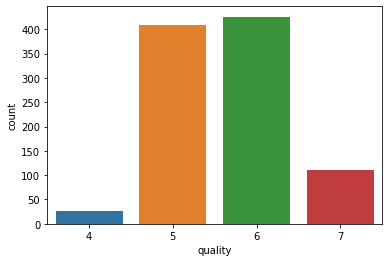

In [250]:
#Univariate Graphical
sns.countplot(x="quality",data=df)
plt.show()

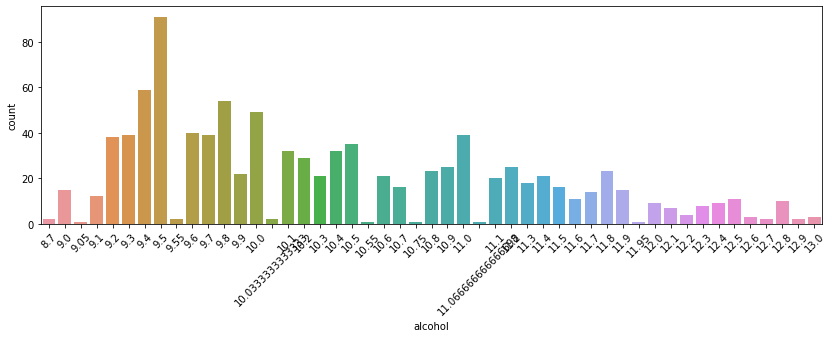

In [257]:
plt.figure(figsize=(14,4))
sns.countplot(x="alcohol",data=df)
plt.xticks(rotation = 45)
plt.show()

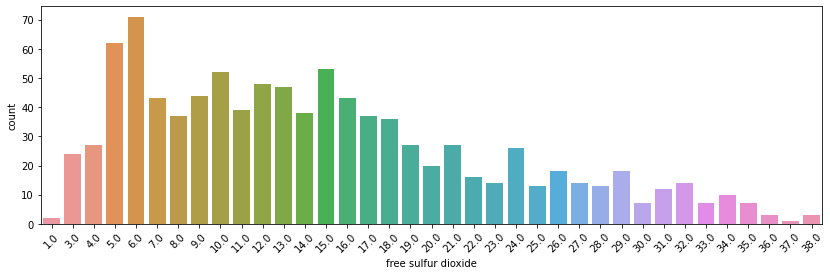

In [258]:
plt.figure(figsize=(14,4))
sns.countplot(x="free sulfur dioxide",data=df)
plt.xticks(rotation = 45)
plt.show()

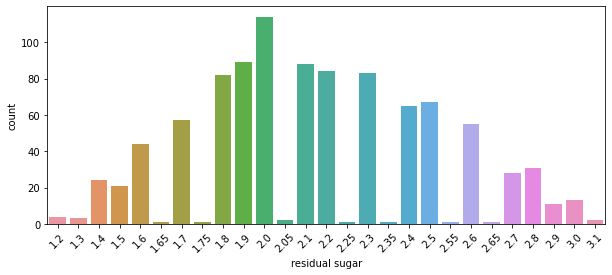

In [260]:
plt.figure(figsize=(10,4))
sns.countplot(x="residual sugar",data=df)
plt.xticks(rotation = 45)
plt.show()

In [262]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

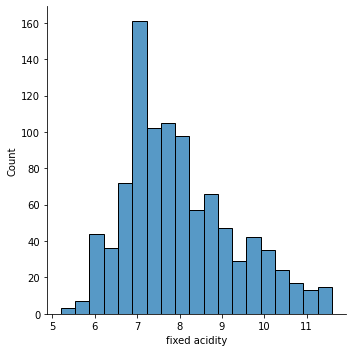

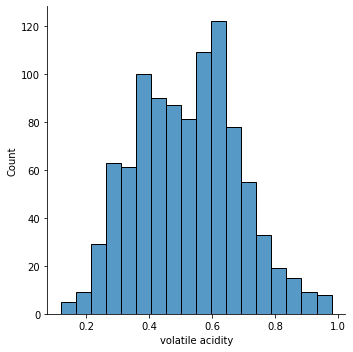

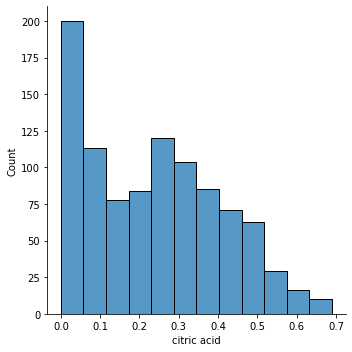

In [263]:
sns.displot(df["fixed acidity"])
sns.displot(df["volatile acidity"])
sns.displot(df["citric acid"])

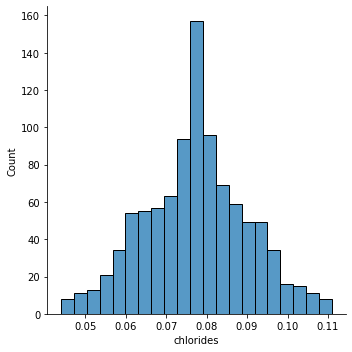

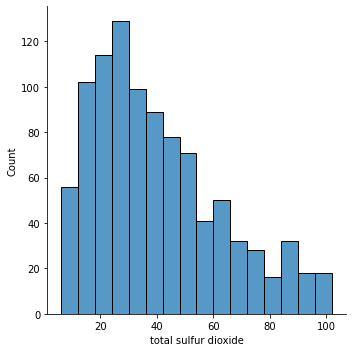

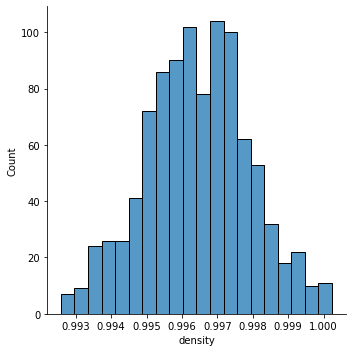

In [264]:
sns.displot(df["chlorides"])
sns.displot(df["total sulfur dioxide"])
sns.displot(df["density"])

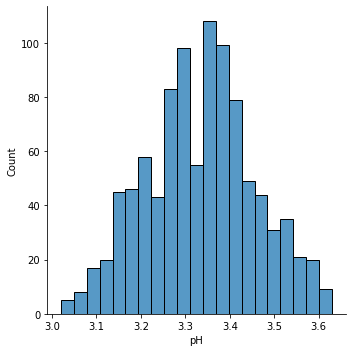

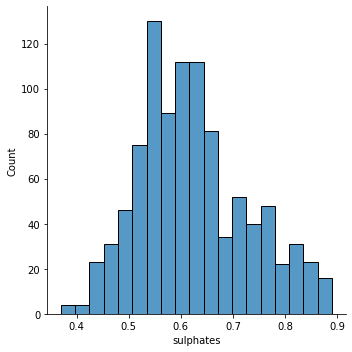

In [265]:
sns.displot(df["pH"])
sns.displot(df["sulphates"])

<AxesSubplot:xlabel='count', ylabel='alcohol'>

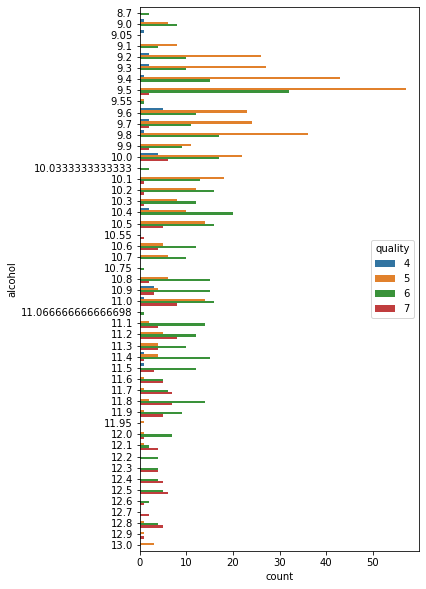

In [267]:
#Bivariate Graphical
plt.figure(figsize=(5,10))
sns.countplot(y="alcohol",hue="quality",data=df)

<AxesSubplot:xlabel='count', ylabel='alcohol'>

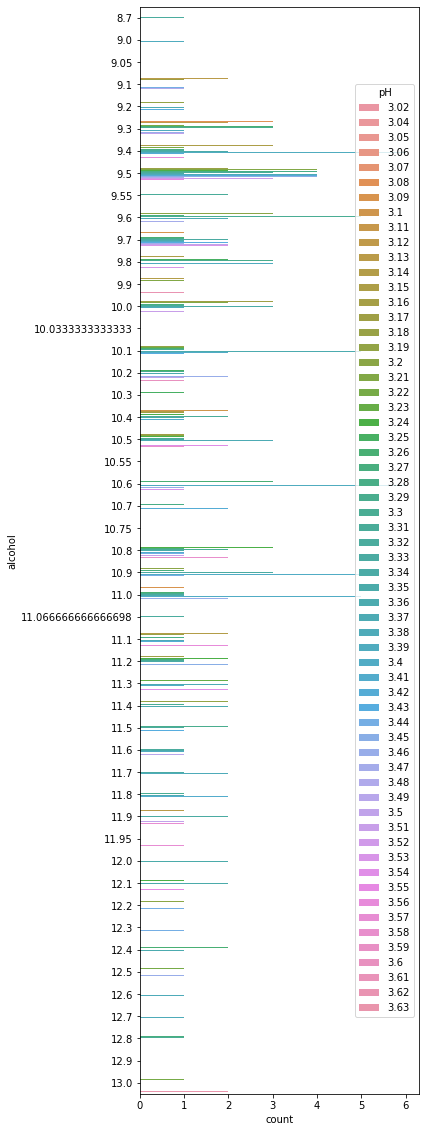

In [272]:
plt.figure(figsize=(5,20))
sns.countplot(y="alcohol",hue="pH",data=df)

<AxesSubplot:xlabel='count', ylabel='quality'>

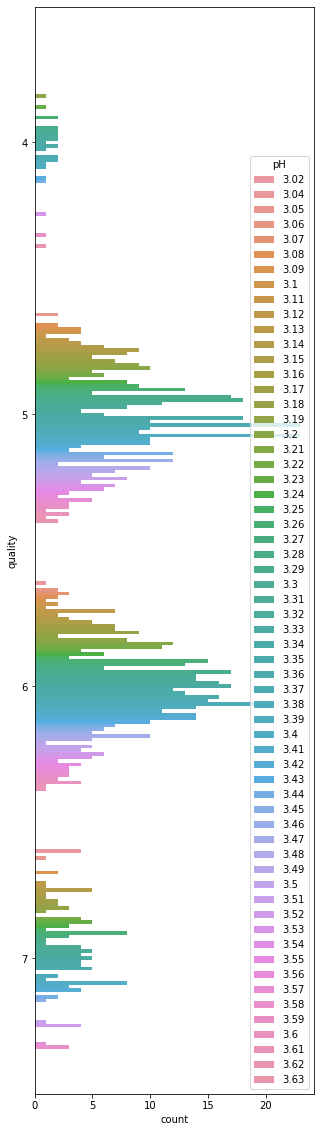

In [273]:
plt.figure(figsize=(5,20))
sns.countplot(y="quality",hue="pH",data=df)

<AxesSubplot:>

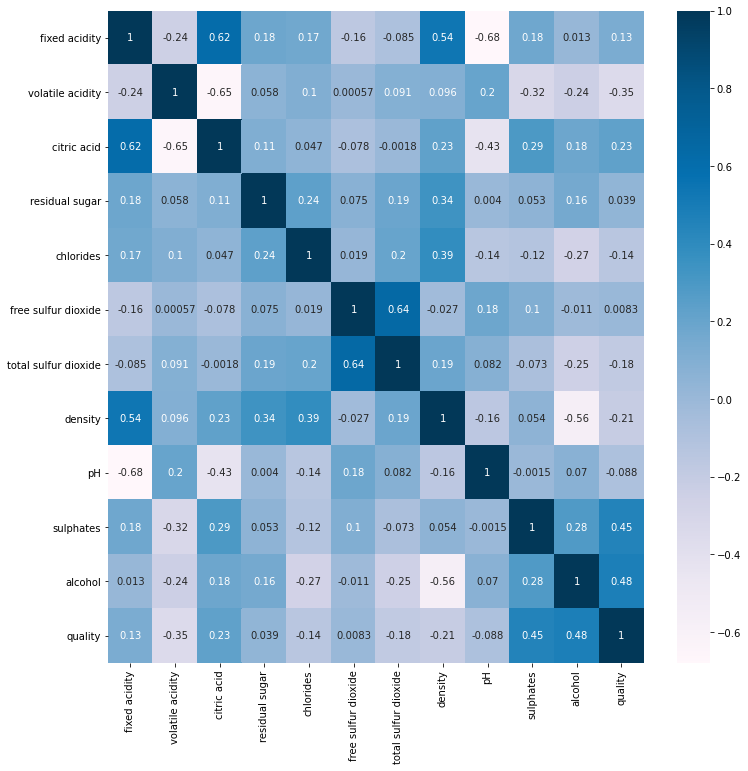

In [246]:
#Graphical representation of data--multivariate 
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cmap="PuBu",annot=True)